<a href="https://colab.research.google.com/github/veydantkatyal/network-intrusion-detection-system-nus/blob/main/network_intrusion_detection_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Generating dataset from csv files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data1=pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data2=pd.read_csv('/content/drive/MyDrive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
datalist=[data1, data2]
rows1, cols1=data1.shape
rows2, cols2=data2.shape
print(f'portscan: {rows1} rows, {cols1} cols')
print(f'webattacks: {rows2} rows, {cols2} cols')

data=pd.concat(datalist)
rows, cols=data.shape
print('\nFinal dataset-')
print(f'rows: {rows}')
print(f'cols: {cols}')

Mounted at /content/drive
portscan: 286467 rows, 79 cols
webattacks: 170366 rows, 79 cols

Final dataset-
rows: 456833
cols: 79


Relabelling portscan and different webattacks to ATTACK

In [ ]:
data[' Label'].unique()

array(['BENIGN', 'PortScan', 'Web Attack � Brute Force',
       'Web Attack � XSS', 'Web Attack � Sql Injection'], dtype=object)

In [ ]:
print("null values: ", data.isna().sum().sum())
data=data.dropna()
duplicate=data.duplicated().sum()
print("duplicates: ", duplicate)
data.drop_duplicates(inplace=True)
print("\ndata after cleaning: ")
print("null values: ", data.isna() .sum().sum())
print("duplicates: ",data.duplicated().sum())
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print('\n',data.shape)

null values:  35
duplicates:  81183

data after cleaning: 
null values:  0
duplicates:  0

 (375195, 79)


In [ ]:
map={'BENIGN':'BENIGN', 'PortScan':'ATTACK', 'Web Attack � Brute Force':'ATTACK', 'Web Attack � XSS':'ATTACK', 'Web Attack � Sql Injection':'ATTACK'}
data[' Label']=data[' Label'].map(map)
data[' Label'].unique()

array(['BENIGN', 'ATTACK'], dtype=object)

Cleaning data- removing duplicates and null values and infinite values


Class Distribution:
 Label
BENIGN    282358
ATTACK     92837
Name: count, dtype: int64


<ipython-input-9-bb2fca94d8d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' Label', data=data, palette='Set2')


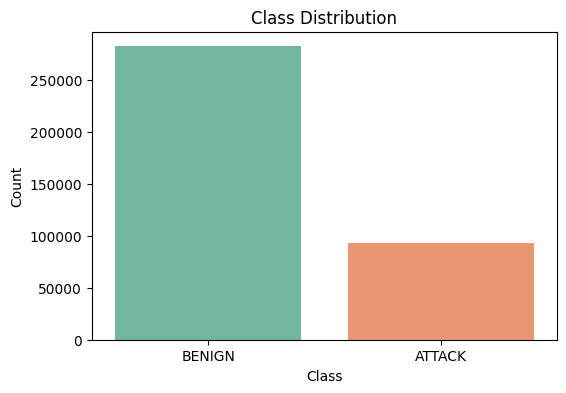

In [ ]:
# Class Distribution
print("\nClass Distribution:")
print(data[' Label'].value_counts())

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=' Label', data=data, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Downsampling benign to match attack and apply stratified random sampling

In [ ]:
benign=data[data[' Label']=='BENIGN']
attack=data[data[' Label']=='ATTACK']
downsampled=resample(benign, replace=False, n_samples=len(attack), random_state=42)
data=pd.concat([downsampled, attack])
data=data.sample(frac=1, random_state=42)
data[' Label'].value_counts()

,count
Label,
BENIGN,92837
ATTACK,92837


In [ ]:
totalsamples = 20000
benigncount = int(totalsamples * 0.6)  # Calculate the desired number of benign samples
attackcount = int(totalsamples * 0.4)  # Calculate the desired number of attack samples

benign = data[data[' Label'] == 'BENIGN']
attack = data[data[' Label'] == 'ATTACK']

# Ensure you don't sample more than the available data
benigncount = min(benigncount, len(benign))  # Adjust benigncount if needed
attackcount = min(attackcount, len(attack))  # Adjust attackcount if needed

benignsample = benign.sample(n=benigncount, random_state=42)
attacksample = attack.sample(n=attackcount, random_state=42)

data = pd.concat([benignsample, attacksample]).sample(frac=1, random_state=42)
data, _ = train_test_split(data, test_size=0.01, stratify=data[' Label'], random_state=42)
data[' Label'].value_counts()

,count
Label,
BENIGN,11880
ATTACK,7920


Encoding Label column to handle categorical data

In [ ]:
label_encoder=preprocessing.LabelEncoder()
data[' Label']=label_encoder.fit_transform(data[' Label'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'ATTACK': 0, 'BENIGN': 1}


Scaling of data

In [ ]:
# Example: Assume `data` is your DataFrame
# Separate the label column
categorical_columns = [' Label']  # Replace with the actual names of categorical columns
numerical_columns = [col for col in data.columns if col not in categorical_columns]

# Separate numerical and categorical data
numerical_data = data[numerical_columns]
categorical_data = data[categorical_columns]

# Apply StandardScaler to the numerical data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert scaled numerical data back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns, index=data.index)

# Recombine numerical and categorical data
data = pd.concat([scaled_numerical_df, categorical_data], axis=1)


In [ ]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
29003,-0.484092,2.285510,-0.082218,-0.060051,-0.091992,-0.045754,-0.153214,1.168571,0.195046,-0.244008,...,-1.044561,-0.014960,-0.124855,-0.092126,0.026476,6.215943,-0.060536,6.064472,6.310786,1
162846,2.800173,-0.303816,-0.114077,-0.082829,-0.127019,-0.046839,-0.259346,-0.272586,-0.298894,-0.244008,...,-1.044561,-0.112579,-0.124855,-0.151104,-0.083725,-0.225688,-0.060536,-0.226617,-0.219437,1
91523,2.651060,-0.303820,-0.082218,-0.105608,-0.124684,-0.046912,-0.259346,-0.272586,-0.298894,-0.244008,...,-1.044561,-0.112579,-0.124855,-0.151104,-0.083725,-0.225688,-0.060536,-0.226617,-0.219437,1
283519,0.046694,-0.303815,-0.114077,-0.082829,-0.127019,-0.046839,-0.259346,-0.272586,-0.298894,-0.244008,...,-1.044561,-0.112579,-0.124855,-0.151104,-0.083725,-0.225688,-0.060536,-0.226617,-0.219437,1
115458,-0.488412,-0.301519,-0.114077,-0.082829,-0.107948,-0.045574,-0.135526,1.408764,0.277370,-0.244008,...,0.518314,-0.112579,-0.124855,-0.151104,-0.083725,-0.225688,-0.060536,-0.226617,-0.219437,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19800 entries, 29003 to 110120
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             19800 non-null  float64
 1    Flow Duration                19800 non-null  float64
 2    Total Fwd Packets            19800 non-null  float64
 3    Total Backward Packets       19800 non-null  float64
 4   Total Length of Fwd Packets   19800 non-null  float64
 5    Total Length of Bwd Packets  19800 non-null  float64
 6    Fwd Packet Length Max        19800 non-null  float64
 7    Fwd Packet Length Min        19800 non-null  float64
 8    Fwd Packet Length Mean       19800 non-null  float64
 9    Fwd Packet Length Std        19800 non-null  float64
 10  Bwd Packet Length Max         19800 non-null  float64
 11   Bwd Packet Length Min        19800 non-null  float64
 12   Bwd Packet Length Mean       19800 non-null  float64
 13   

In [ ]:
data.to_csv('data.csv', index=False)
print("\nCleaned dataset saved as 'data.csv'")


Cleaned dataset saved as 'data.csv'


EDA

In [ ]:
# Dataset Information
print("Dataset Information:")
print(data.info())

# First Few Rows
print("\nFirst Few Rows:")
print(data.head())

# Dataset Shape
print(f"\nDataset Shape: {data.shape}")

# Unique Value Count
print("\nUnique Value Count Per Column:")
print(data.nunique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 19800 entries, 29003 to 110120
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             19800 non-null  float64
 1    Flow Duration                19800 non-null  float64
 2    Total Fwd Packets            19800 non-null  float64
 3    Total Backward Packets       19800 non-null  float64
 4   Total Length of Fwd Packets   19800 non-null  float64
 5    Total Length of Bwd Packets  19800 non-null  float64
 6    Fwd Packet Length Max        19800 non-null  float64
 7    Fwd Packet Length Min        19800 non-null  float64
 8    Fwd Packet Length Mean       19800 non-null  float64
 9    Fwd Packet Length Std        19800 non-null  float64
 10  Bwd Packet Length Max         19800 non-null  float64
 11   Bwd Packet Length Min        19800 non-null  float64
 12   Bwd Packet Length Mean       19800 non


Class Distribution:
 Label
1    11880
0     7920
Name: count, dtype: int64


<ipython-input-18-bb2fca94d8d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' Label', data=data, palette='Set2')


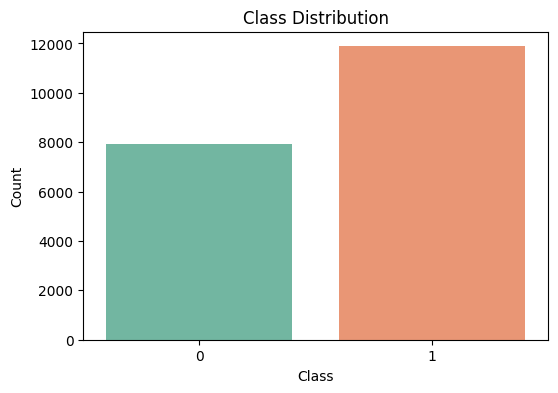

In [ ]:
# Class Distribution
print("\nClass Distribution:")
print(data[' Label'].value_counts())

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=' Label', data=data, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
        Destination Port   Flow Duration   Total Fwd Packets  \
count       1.980000e+04    1.980000e+04        1.980000e+04   
mean       -3.086196e-17   -7.894919e-18       -1.973730e-18   
std         1.000025e+00    1.000025e+00        1.000025e+00   
min        -4.916833e-01   -3.038202e-01       -1.140773e-01   
25%        -4.884121e-01   -3.038183e-01       -1.140773e-01   
50%        -4.643416e-01   -3.038136e-01       -1.140773e-01   
75%        -1.323539e-01   -3.013926e-01       -8.221840e-02   
max         3.544075e+00    4.262805e+00        1.135265e+02   

        Total Backward Packets  Total Length of Fwd Packets  \
count             1.980000e+04                 1.980000e+04   
mean              1.076580e-18                -6.818339e-18   
std               1.000025e+00                 1.000025e+00   
min              -1.056081e-01                -1.293539e-01   
25%              -8.282937e-02                -1.293539e-01   
50


Missing Values Per Column:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


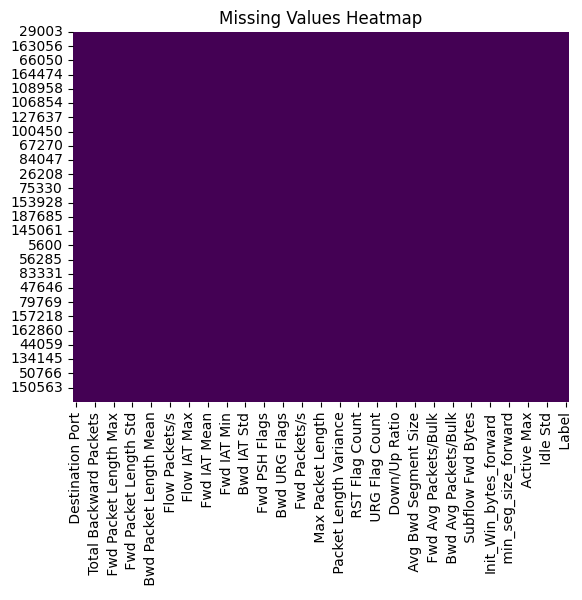

In [ ]:
# Missing Values
print("\nMissing Values Per Column:")
print(data.isnull().sum())

# Visualize Missing Values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

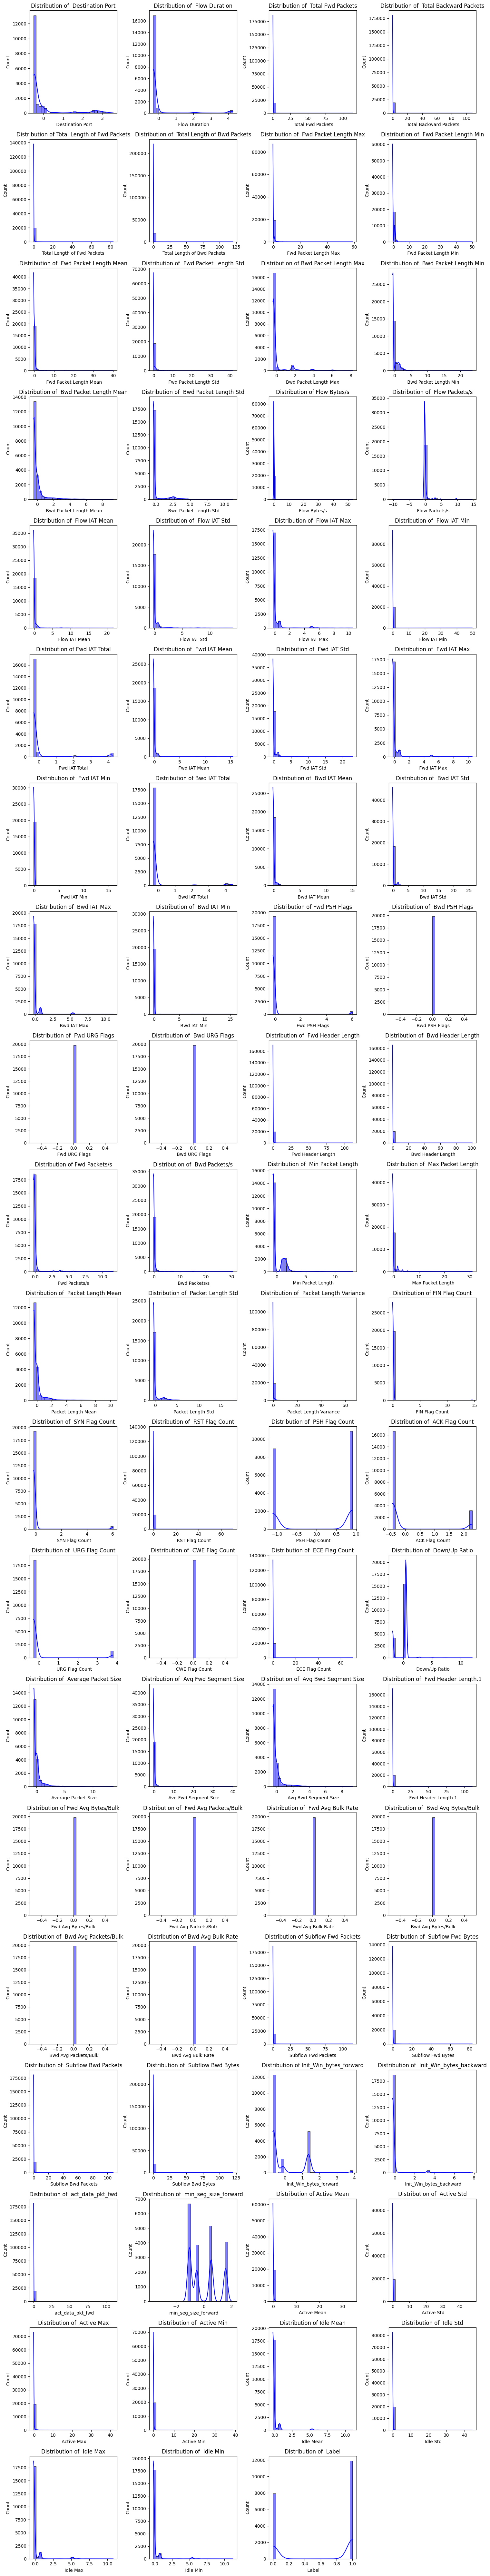

In [ ]:
# Numeric Features Distribution
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 3) // 4  # Calculate rows to fit all columns

plt.figure(figsize=(15, num_rows * 4))  # Adjust figure height based on rows
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 4, i)  # Use calculated rows and 4 columns
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Selecting features based on correlation

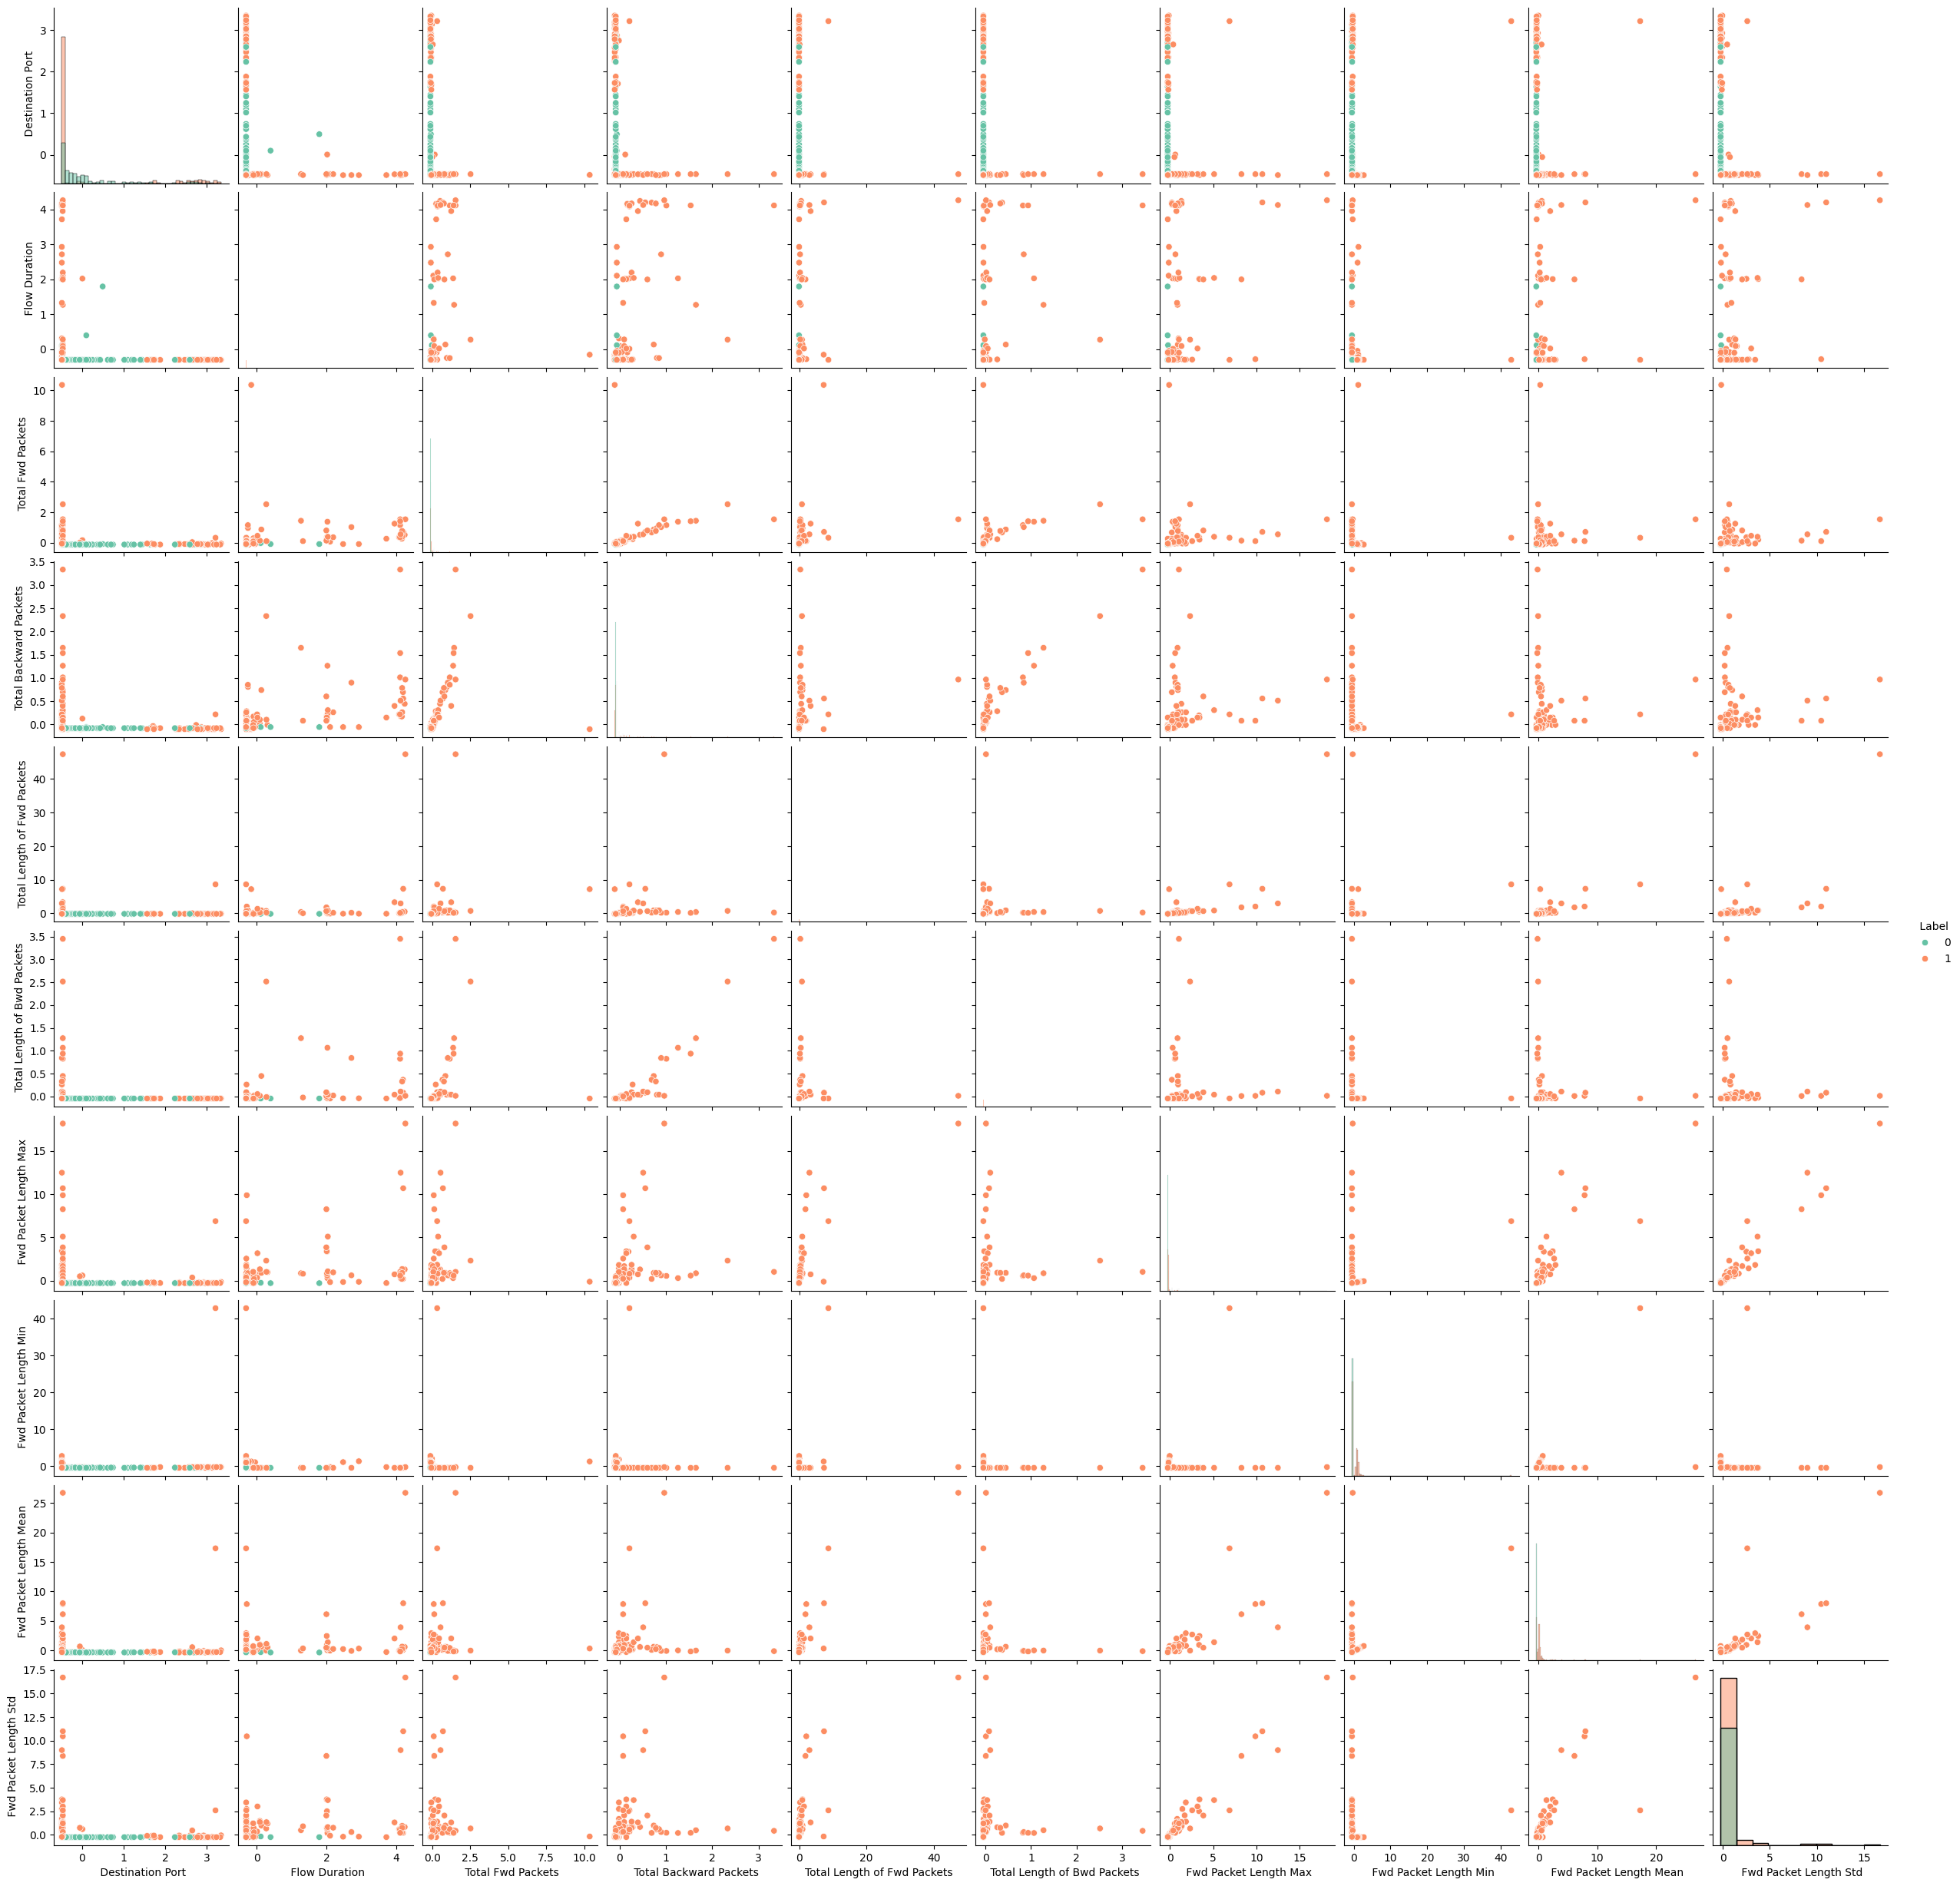

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = data[numeric_cols].corr()

# Calculate correlations with ' Label' directly without joining
label_corr = corr_matrix.corrwith(data[' Label']).sort_values(ascending=False)

key_features = label_corr.abs().nlargest(10).index.tolist()


if ' Label' not in key_features:
    key_features.append(' Label')


data_sampled = data[key_features].dropna().sample(n=500, random_state=42)

# Convert 'Label' back to categorical for visualization
data_sampled[' Label'] = data_sampled[' Label'].astype('category')

# Plot pairplot
sns.pairplot(data_sampled, diag_kind='hist', hue=' Label', palette='Set2')
plt.show()


Correlation Matrix:


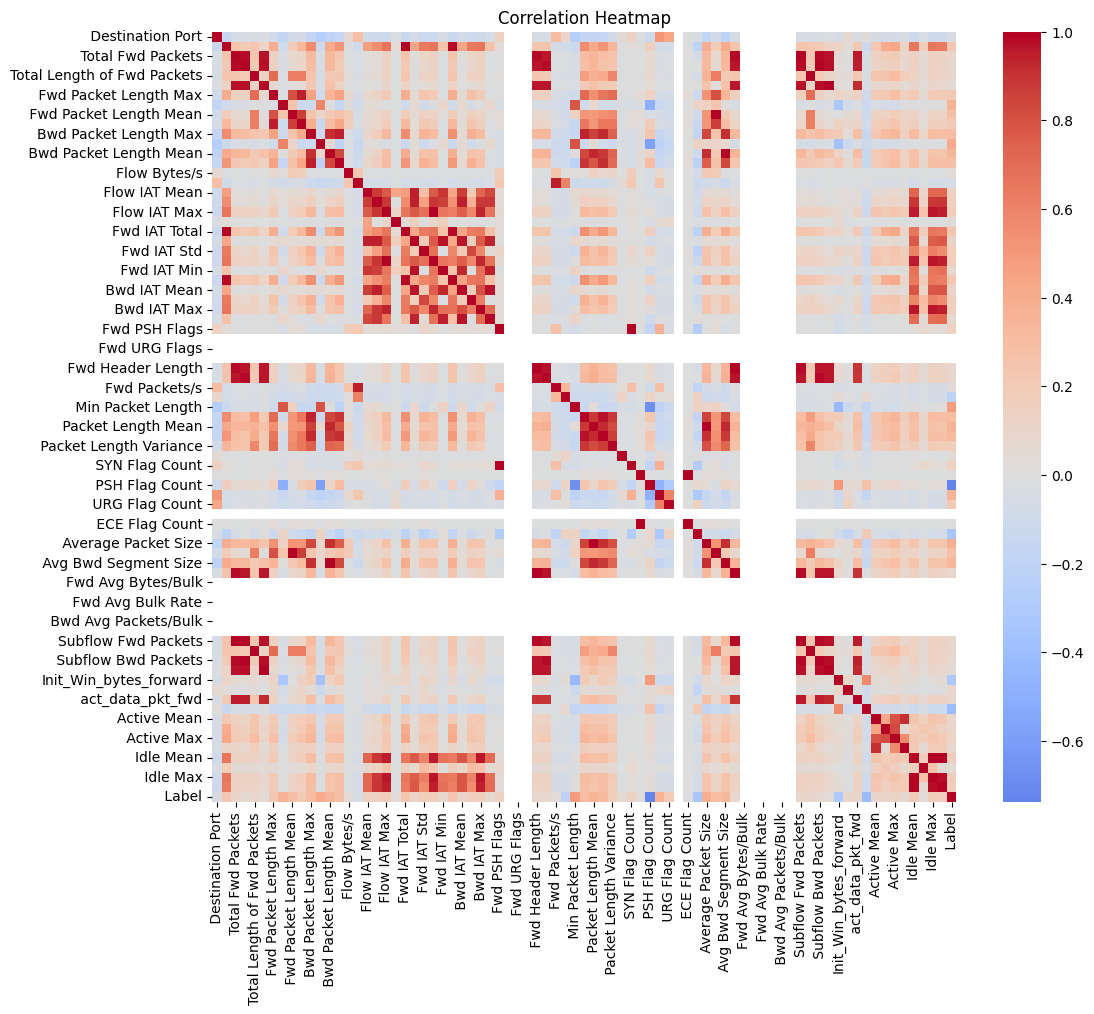

In [ ]:
print("\nCorrelation Matrix:")
corr_matrix = data.select_dtypes(include=['number']).corr()  # Include only numerical features

# Visualize the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr = data.corr(numeric_only=True).round(2)
selected_features = corr[' Label'][abs(corr[' Label']) > 0.3].index.tolist()
print("Selected Features (initial correlation filtering):\n", selected_features)


Selected Features (initial correlation filtering):
 [' Fwd Packet Length Min', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Min Packet Length', ' Packet Length Mean', ' Packet Length Std', ' PSH Flag Count', ' ACK Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Bwd Segment Size', 'Init_Win_bytes_forward', ' min_seg_size_forward', ' Label']


In [ ]:
high_corr_pairs = corr[(corr.abs() > 0.8) & (corr.abs() < 1)].stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
print("Highly Correlated Feature Pairs:\n", high_corr_pairs)

Highly Correlated Feature Pairs:
                Feature1                      Feature2  Correlation
0         Flow Duration                 Bwd IAT Total         0.99
1     Total Fwd Packets        Total Backward Packets         0.98
2     Total Fwd Packets   Total Length of Bwd Packets         0.97
3     Total Fwd Packets             Fwd Header Length         0.99
4     Total Fwd Packets             Bwd Header Length         0.97
..                  ...                           ...          ...
225            Idle Min                  Flow IAT Max         0.94
226            Idle Min                   Fwd IAT Max         0.94
227            Idle Min                   Bwd IAT Max         0.94
228            Idle Min                     Idle Mean         0.99
229            Idle Min                      Idle Max         0.98

[230 rows x 3 columns]


In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

pos_corr_features = corr[' Label'][(corr[' Label'] > 0.35) & (corr[' Label'] < 1)].index.tolist()

print("Features with positive correlation with 'Label':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, ' Label']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))


Features with positive correlation with 'Label':

1.   Fwd Packet Length Min   :0.36
2.   Bwd Packet Length Min   :0.41
3.   Min Packet Length       :0.49
4.   Packet Length Mean      :0.36
5.   Average Packet Size     :0.39


In [ ]:
tempdata=data

In [ ]:
data=data[pos_corr_features+[' Label']]
data.head()

,Fwd Packet Length Min,Bwd Packet Length Min,Min Packet Length,Packet Length Mean,Average Packet Size,Label
29003,1.168571,0.210132,1.622800,-0.123744,-0.100031,1
162846,-0.272586,-0.495301,-0.359553,-0.424456,-0.447634,1
91523,-0.272586,-0.596077,-0.359553,-0.424456,-0.447634,1
283519,-0.272586,-0.495301,-0.359553,-0.424456,-0.447634,1
115458,1.408764,1.268280,1.953192,0.060025,0.244164,1



Visualizing Outliers Before Handling:


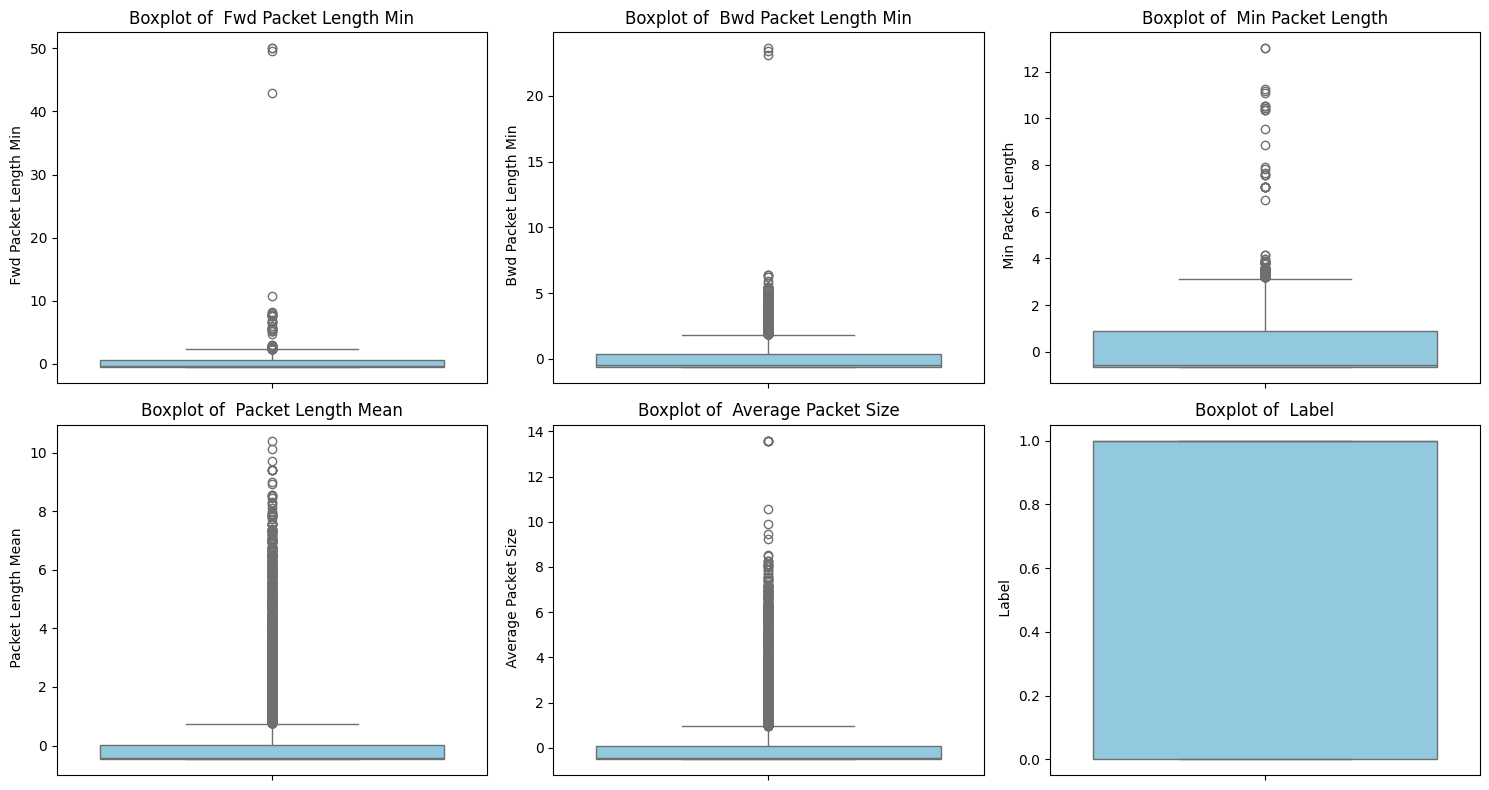


 Fwd Packet Length Min Summary:
Q1: -0.4784655618803811, Q3: 0.6195589372264727, IQR: 1.0980244991068537
Lower Bound: -3.7725390592009425, Upper Bound: 3.9136324345470337
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 32

 Bwd Packet Length Min Summary:
Q1: -0.5960767634118898, Q3: 0.37809172023829574, IQR: 0.9741684836501855
Lower Bound: -3.5185822143624463, Upper Bound: 3.300597171188852
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 194

 Min Packet Length Summary:
Q1: -0.6427462794254238, Q3: 0.8676179662119742, IQR: 1.510364245637398
Lower Bound: -5.1738390163376184, Upper Bound: 5.398710703124169
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 0

 Packet Length Mean Summary:
Q1: -0.45309520346296916, Q3: 0.015156415976291344, IQR: 0.4682516194392605
Lower Bound: -1.8578500617807507, Upper Bound: 1.419911274294073
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 1216

 Average Packet Size Summary:
Q1: -0.4885288186460324, Q3: 0.01413251362

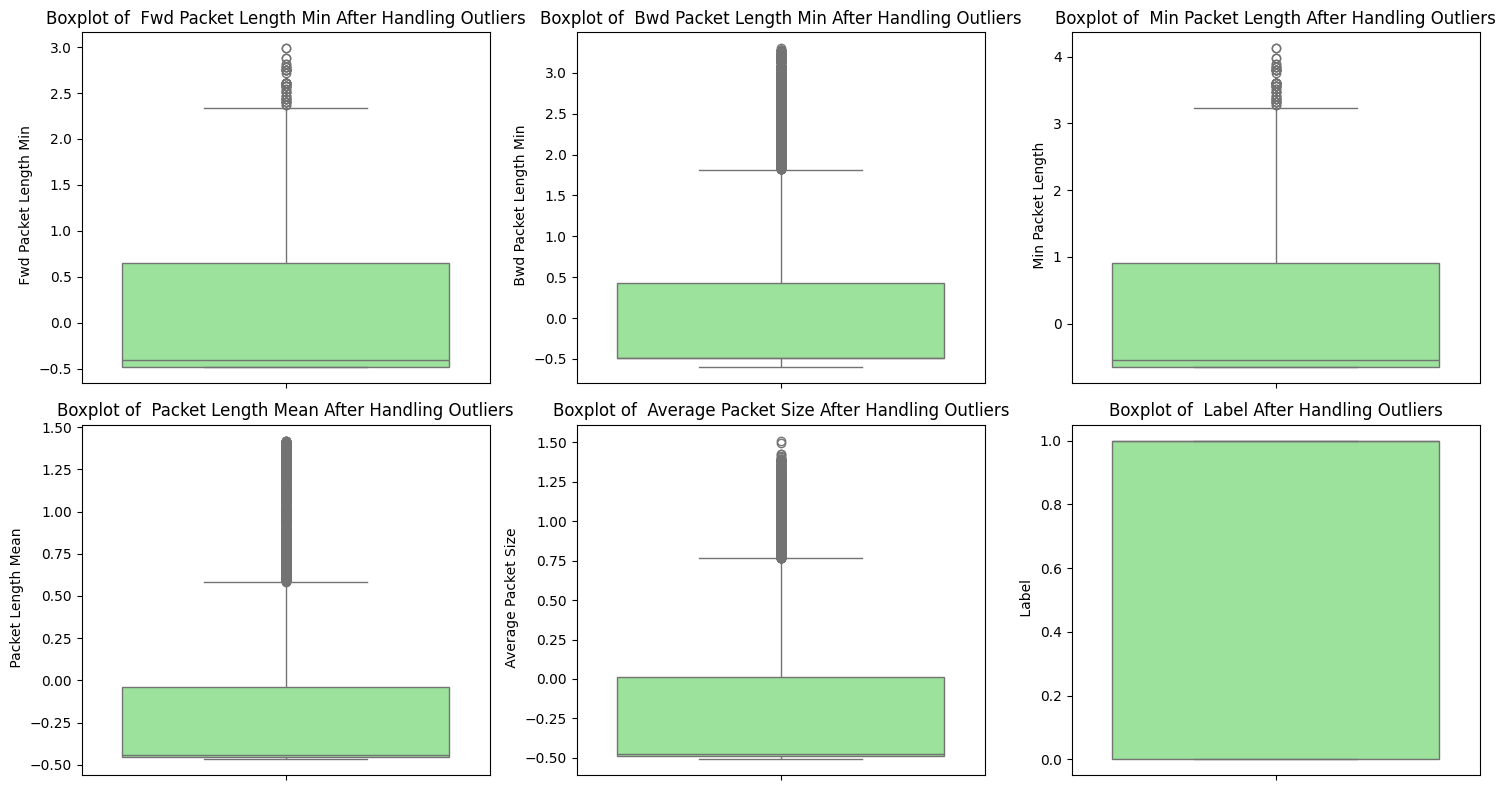


Total Outliers Detected and Removed Across All Columns: 1443


In [ ]:
print("\nVisualizing Outliers Before Handling:")
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Subplots for better readability
rows, cols = (len(numeric_cols) + 2) // 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(y=data[col], ax=ax, color='skyblue')
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)

# Remove unused subplots
for i in range(len(numeric_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Outlier Removal Function
def remove_outliers(df, numeric_cols):
    total_outliers = 0  # Counter for total outliers detected
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3* IQR
        upper_bound = Q3 + 3* IQR

        # Detect outliers
        outliers_below = (df[col] < lower_bound).sum()
        outliers_above = (df[col] > upper_bound).sum()
        total_outliers += outliers_below + outliers_above

        # Print outlier details
        print(f"\n{col} Summary:")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Outliers Below Lower Bound: {outliers_below}")
        print(f"Outliers Above Upper Bound: {outliers_above}")

        # Remove rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"\nTotal Outliers Detected and Removed Across All Columns: {total_outliers}")
    return df, total_outliers

# Apply outlier removal
data, total_outliers_removed = remove_outliers(data, numeric_cols)

# Save cleaned dataset to a new CSV file


# Visualize Boxplots After Outlier Handling
print("\nVisualizing Outliers After Handling:")
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(y=data[col], ax=ax, color='lightgreen')
    ax.set_title(f"Boxplot of {col} After Handling Outliers")
    ax.set_ylabel(col)

# Remove unused subplots
for i in range(len(numeric_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Print total outliers removed
print(f"\nTotal Outliers Detected and Removed Across All Columns: {total_outliers_removed}")


In [ ]:
data.shape
data.to_csv('final_features.csv', index=False)

# ML MODELS

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
selected_features=data.drop(' Label', axis=1).columns
X=data[selected_features]
y=data[' Label']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, target_names=['1', '0']):
    y_pred = model.predict(X_test)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    return accuracy


**LOGISTIC REGRESSION**

In [ ]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print("\nLogistic Regression Performance:")
accuracy_lr = evaluate_model(lr, X_test, y_test, target_names=['1', '0'])


Logistic Regression Performance:

Classification Report:
              precision    recall  f1-score   support

           1       0.84      1.00      0.91      2795
           0       1.00      0.86      0.92      3630

    accuracy                           0.92      6425
   macro avg       0.92      0.93      0.92      6425
weighted avg       0.93      0.92      0.92      6425

Accuracy: 0.9188


**RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("\nRandom Forest Performance:")
accuracy_rf = evaluate_model(rf, X_test, y_test, target_names=['1', '0'])


Random Forest Performance:

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99      2795
           0       0.98      1.00      0.99      3630

    accuracy                           0.99      6425
   macro avg       0.99      0.99      0.99      6425
weighted avg       0.99      0.99      0.99      6425

Accuracy: 0.9885


**KNN**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\nKNN Performance:")
accuracy_knn = evaluate_model(knn, X_test, y_test, target_names=['1', '0'])


KNN Performance:

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98      2795
           0       0.98      1.00      0.99      3630

    accuracy                           0.99      6425
   macro avg       0.99      0.99      0.99      6425
weighted avg       0.99      0.99      0.99      6425

Accuracy: 0.9868


**SVM**

In [ ]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
print("\nSVM Performance:")
accuracy_svc = evaluate_model(svc, X_test, y_test, target_names=['1','0'])


SVM Performance:

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.97      0.97      2795
           0       0.98      0.98      0.98      3630

    accuracy                           0.98      6425
   macro avg       0.98      0.98      0.98      6425
weighted avg       0.98      0.98      0.98      6425

Accuracy: 0.9777


**NAIVE BAYES**

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
print("\nNaive Bayes Performance:")
accuracy_nb = evaluate_model(nb, X_test, y_test, target_names=['1', '0'])


Naive Bayes Performance:

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.97      0.97      2795
           0       0.98      0.97      0.97      3630

    accuracy                           0.97      6425
   macro avg       0.97      0.97      0.97      6425
weighted avg       0.97      0.97      0.97      6425

Accuracy: 0.9696


**GRADIENT BOOSTING**

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print("\nGradient Boosting Performance:")
accuracy_gb = evaluate_model(gb, X_test, y_test, target_names=['1', '0'])


Gradient Boosting Performance:

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99      2795
           0       0.98      1.00      0.99      3630

    accuracy                           0.99      6425
   macro avg       0.99      0.99      0.99      6425
weighted avg       0.99      0.99      0.99      6425

Accuracy: 0.9877


In [ ]:
!pip install --upgrade scikit-learn

**ML MODEL COMPARISON**


Model Performance Comparison:
Logistic Regression: Accuracy = 0.9188
Random Forest: Accuracy = 0.9885
KNN: Accuracy = 0.9868
SVM: Accuracy = 0.9777
Naive Bayes: Accuracy = 0.9696
Gradient Boosting: Accuracy = 0.9877


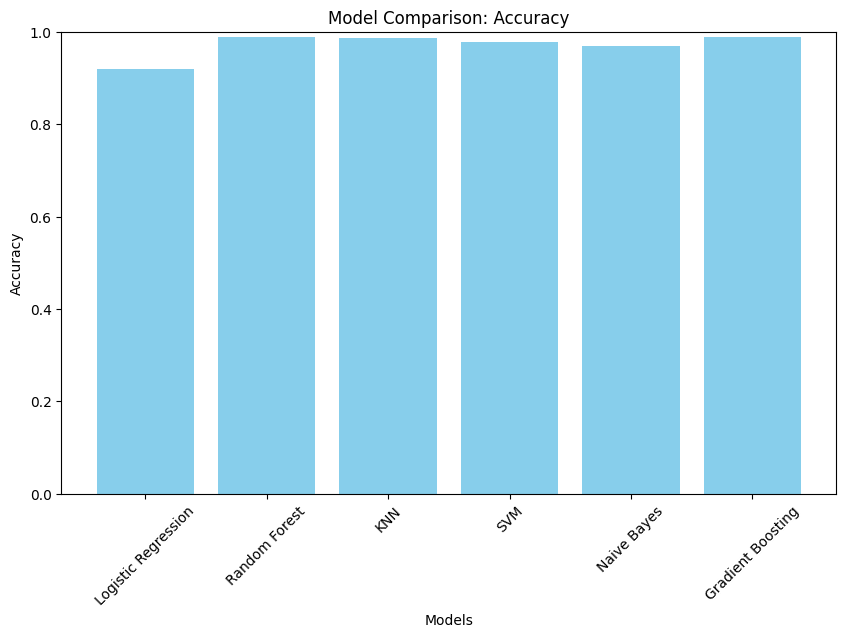


Best Model: Random Forest
Accuracy: 0.9885


In [ ]:
# Store Model Performance
ml_model_results = {
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf,
    "KNN": accuracy_knn,
    "SVM": accuracy_svc,
    "Naive Bayes": accuracy_nb,
    "Gradient Boosting": accuracy_gb,
}


ml_model_results["KNN"] = accuracy_knn

# Print Model Performance
print("\nModel Performance Comparison:")
for model, accuracy in ml_model_results.items():
    print(f"{model}: Accuracy = {accuracy:.4f}")

# Generate Comparison Chart
plt.figure(figsize=(10, 6))
plt.bar(ml_model_results.keys(), ml_model_results.values(), color='skyblue')
plt.title("Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Determine Best Model
best_model_name = max(ml_model_results, key=ml_model_results.get)
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {ml_model_results[best_model_name]:.4f}")


**CHECK FOR OVERFITTING**

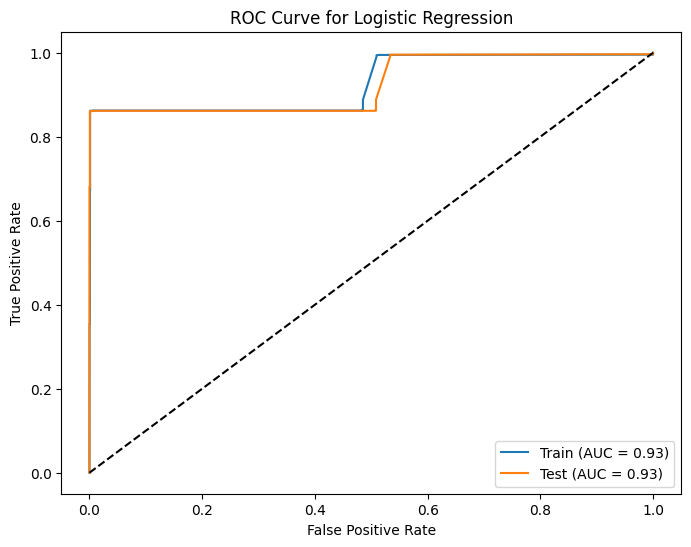

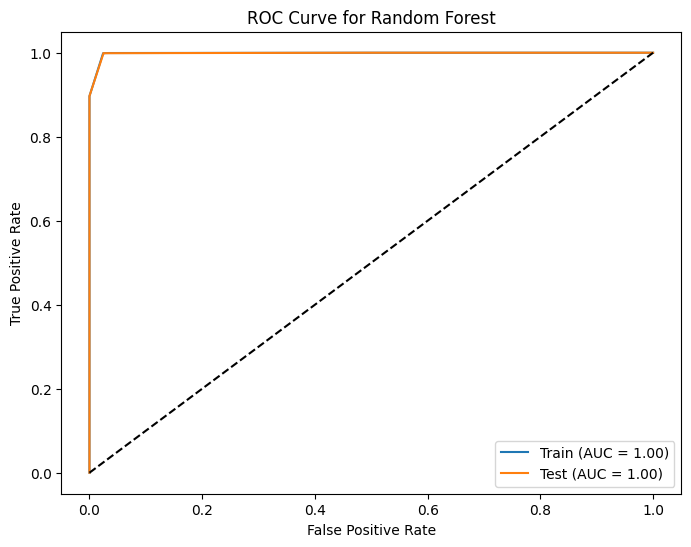

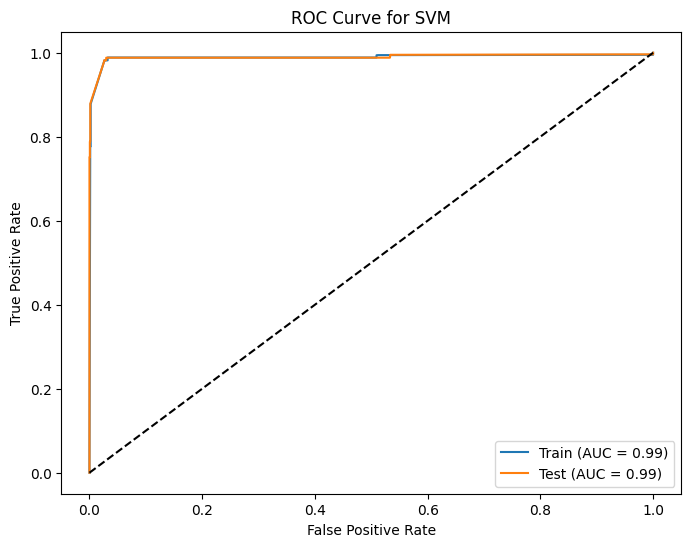

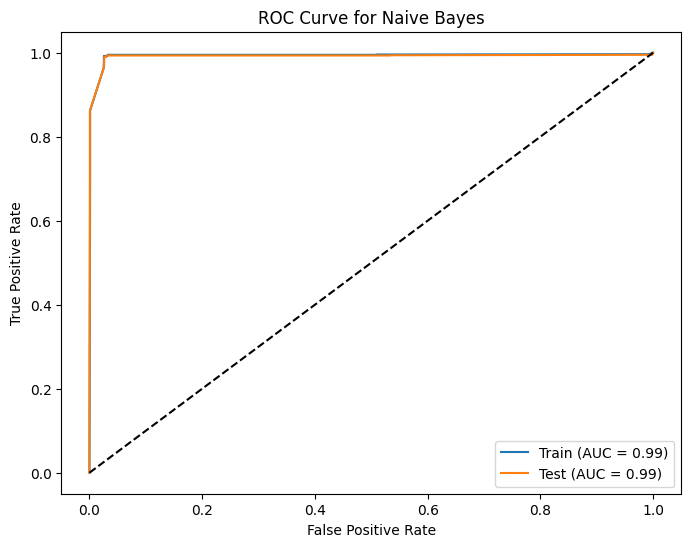

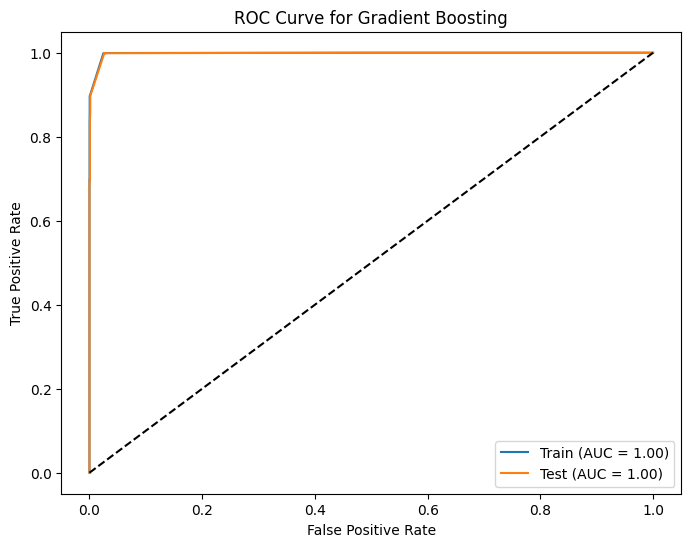

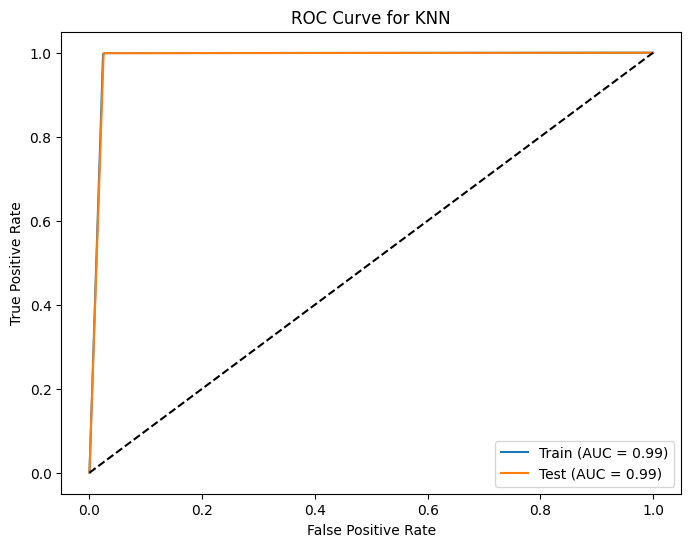

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


# Example usage (assuming you have trained models lr, rf, svc, nb, gb, knn):
plot_roc_auc(lr, X_train, X_test, y_train, y_test, "Logistic Regression")
plot_roc_auc(rf, X_train, X_test, y_train, y_test, "Random Forest")
plot_roc_auc(svc, X_train, X_test, y_train, y_test, "SVM")
plot_roc_auc(nb, X_train, X_test, y_train, y_test, "Naive Bayes")
plot_roc_auc(gb, X_train, X_test, y_train, y_test, "Gradient Boosting")

if hasattr(knn, "predict_proba"):
    plot_roc_auc(knn, X_train, X_test, y_train, y_test, "KNN")
else:
    print("KNN does not support predict_proba, cannot plot ROC curve.")

**SAVE ML MODELS**

In [ ]:
import joblib
from sklearn.metrics import classification_report

# Dictionary of trained models
models = {
    "Logistic Regression": lr,  # Replace with your trained Logistic Regression model
    "Random Forest": rf,        # Replace with your trained Random Forest model
    "KNN": knn,                 # Replace with your trained KNN model
    "SVM": svc,                 # Replace with your trained SVM model
    "Naive Bayes": nb,          # Replace with your trained Naive Bayes model
    "Gradient Boosting": gb     # Replace with your trained Gradient Boosting model
}

# Save models and generate classification reports
for model_name, model in models.items():
    print(f"\nGenerating Classification Report for {model_name}:")

    # Generate predictions
    y_pred = model.predict(X_test)

    # Classification report
    print(classification_report(y_test, y_pred))

    # Save the model using joblib
    file_name = f"{model_name.replace(' ', '_')}.pkl"
    joblib.dump(model, file_name)
    print(f"{model_name} has been saved as '{file_name}'")



Generating Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2795
           1       1.00      0.86      0.92      3630

    accuracy                           0.92      6425
   macro avg       0.92      0.93      0.92      6425
weighted avg       0.93      0.92      0.92      6425

Logistic Regression has been saved as 'Logistic_Regression.pkl'

Generating Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2795
           1       0.98      1.00      0.99      3630

    accuracy                           0.99      6425
   macro avg       0.99      0.99      0.99      6425
weighted avg       0.99      0.99      0.99      6425

Random Forest has been saved as 'Random_Forest.pkl'

Generating Classification Report for KNN:
              precision    recall  f1-score   support

           0       1

# **DEEP LEARNING**

**1D-CNN**

In [ ]:
data.shape

(18357, 6)

**RESHAPING & SCALING**

In [ ]:
# Reshape features for 1D CNN: (samples, timesteps, features)
X_reshaped = X.values.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.35, random_state=42)

# Print shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11932, 5, 1)
y_train shape: (11932,)
X_test shape: (6425, 5, 1)
y_test shape: (6425,)


**MODEL DEFINITION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

cnn_model = Sequential()

# Single Conv1D layer with fewer filters
cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu', padding='same', input_shape=(4, 1)))

# MaxPooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten layer
cnn_model.add(Flatten())

# Fully Connected Layer
cnn_model.add(Dense(64, activation='relu'))

# Output Layer for binary classification
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

**MODEL TRAINING**

In [ ]:
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Changed 'model' to 'cnn_model' to evaluate the correct model
test_loss, test_accuracy_cnn = cnn_model.evaluate(X_test, y_test)
print(test_accuracy_cnn)

Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9876 - loss: 0.0460 - val_accuracy: 0.9846 - val_loss: 0.0547
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0484 - val_accuracy: 0.9846 - val_loss: 0.0543
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9854 - loss: 0.0519 - val_accuracy: 0.9846 - val_loss: 0.0595
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9843 - loss: 0.0513 - val_accuracy: 0.9846 - val_loss: 0.0543
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9862 - loss: 0.0494 - val_accuracy: 0.9846 - val_loss: 0.0526
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9859 - loss: 0.0527 - val_accuracy: 0.9846 - val_loss: 0.0600
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0533 - val_accuracy: 0.9846 - val_loss: 0.0527
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0574 - val_accu

**CHECK FOR OVERFITTING**

373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


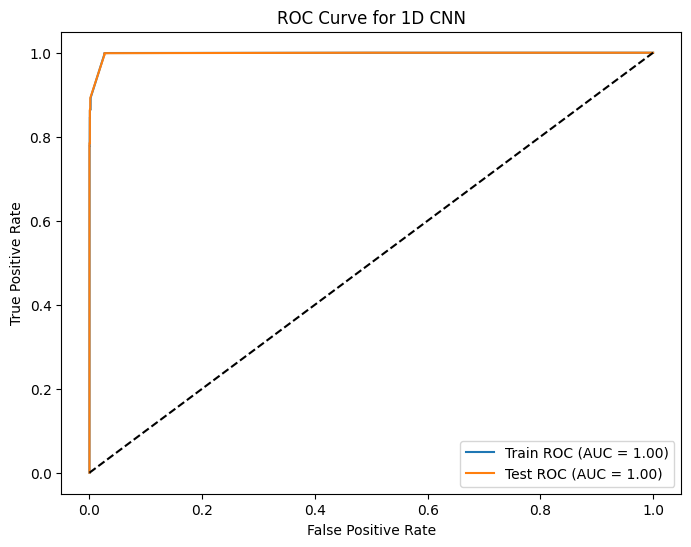

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc_cnn(model, X_train, y_train, X_test, y_test, model_name="1D CNN"):
    # Predictions for ROC using predict for Keras models
    y_train_pred_proba = model.predict(X_train).ravel()  # Flatten for ROC
    y_test_pred_proba = model.predict(X_test).ravel()

    # Compute ROC for training
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    auc_train = auc(fpr_train, tpr_train)

    # Compute ROC for testing
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    auc_test = auc(fpr_test, tpr_test)

    # Plot ROC Curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.2f})")
    plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
# Assuming 'model' is your trained 1D CNN model, previously named 'cnn_model'
plot_roc_auc_cnn(cnn_model, X_train, y_train, X_test, y_test, "1D CNN") # Changed cnn_model to model

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions for 1D CNN model
# Reshape X_test to match the expected input shape (samples, features, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Use actual number of features


y_pred_cnn = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)

# Classification Report for 1D CNN
print("\n1D CNN Model Classification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=['0', '1']))

201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

1D CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2795
           1       0.98      0.99      0.99      3630

    accuracy                           0.98      6425
   macro avg       0.99      0.98      0.98      6425
weighted avg       0.98      0.98      0.98      6425



**LSTM**

**RESHAPING & SCALING**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Reshape features for LSTM: (samples, timesteps, features)
X_scaled = MinMaxScaler().fit_transform(X)  # Scale features to [0, 1]
X_reshaped = X_scaled.reshape(-1, X_scaled.shape[1], 1)  # Reshape to (samples, timesteps, features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.35, random_state=42)

**MODEL DEFINITION**

In [ ]:
# Define LSTM Model
lstm_model = Sequential()

# Add LSTM layer
lstm_model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add Dropout layer to prevent overfitting
lstm_model.add(Dropout(0.2))

# Add Fully Connected layer
lstm_model.add(Dense(64, activation='relu'))

# Add Output layer for binary classification
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define LSTM Model
lstm_model = Sequential()

# Add LSTM layer
lstm_model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add Dropout layer to prevent overfitting
lstm_model.add(Dropout(0.2))

# Add Fully Connected layer
lstm_model.add(Dense(64, activation='relu'))

# Add Output layer for binary classification
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,729 (53.63 KB)

 Trainable params: 13,729 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

**MODEL TRAINING**

In [ ]:
# Train the model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy_lstm = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {test_accuracy_lstm}")

Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7689 - loss: 0.4617 - val_accuracy: 0.9433 - val_loss: 0.1574
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9520 - loss: 0.1413 - val_accuracy: 0.9767 - val_loss: 0.0781
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9731 - loss: 0.1004 - val_accuracy: 0.9816 - val_loss: 0.0670
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9819 - loss: 0.0742 - val_accuracy: 0.9819 - val_loss: 0.0803
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9805 - loss: 0.0726 - val_accuracy: 0.9774 - val_loss: 0.0726
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9810 - loss: 0.0740 - val_accuracy: 0.9809 - val_loss: 0.0624
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9798 - loss: 0.0696 - val_accuracy: 0.9816 - val_loss: 0.0605
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9809 - loss: 0.0717 - val_acc

**CHECK FOR OVERFITTING**

373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


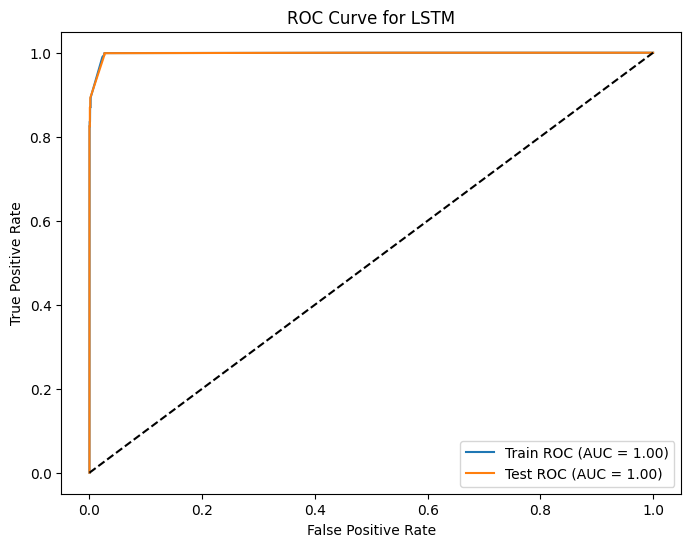

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Predictions for ROC using predict for Keras models
    y_train_pred_proba = model.predict(X_train)
    y_test_pred_proba = model.predict(X_test)

    # Compute ROC for training
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    auc_train = auc(fpr_train, tpr_train)

    # Compute ROC for testing
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    auc_test = auc(fpr_test, tpr_test)

    # Plot ROC Curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.2f})")
    plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Example usage (assuming you have a trained model)
# Assuming 'lstm_model' is your trained LSTM model
plot_roc_auc(lstm_model, X_train, y_train, X_test, y_test, "LSTM")

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions for LSTM model
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype(int)

# Classification Report for LSTM
print("\nLSTM Model Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=['0', '1']))


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

LSTM Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2795
           1       0.98      0.99      0.99      3630

    accuracy                           0.99      6425
   macro avg       0.99      0.98      0.98      6425
weighted avg       0.99      0.99      0.99      6425



**ANN**

**RESHAPING & SCALING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the features to scale them between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=42, stratify=y)

# Print shapes
print("X_train shape:", X_train.shape)  # Expected shape: (samples_train, features)
print("y_train shape:", y_train.shape)  # Expected shape: (samples_train,)
print("X_test shape:", X_test.shape)    # Expected shape: (samples_test, features)
print("y_test shape:", y_test.shape)    # Expected shape: (samples_test,)


X_train shape: (11932, 5)
y_train shape: (11932,)
X_test shape: (6425, 5)
y_test shape: (6425,)


**MODEL DEFINTION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the ANN model
ann_model = Sequential()

# Input Layer
ann_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Hidden Layers
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Output Layer for binary classification
ann_model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary output

# Compile the model
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Binary crossentropy for binary classification
    metrics=['accuracy']
)

# Model summary
ann_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

**MODEL TRAINING**

In [ ]:
# Train the ANN
history = ann_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model on test data
test_loss, test_accuracy_ann = ann_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_ann}")


Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9865 - loss: 0.0441 - val_accuracy: 0.9843 - val_loss: 0.0503
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9874 - loss: 0.0393 - val_accuracy: 0.9863 - val_loss: 0.0506
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9863 - val_loss: 0.0494
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9861 - loss: 0.0430 - val_accuracy: 0.9843 - val_loss: 0.0492
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0409 - val_accuracy: 0.9863 - val_loss: 0.0505
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9863 - val_loss: 0.0488
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9843 - val_loss: 0.0500
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accu

**MODEL EVALUATION**


Deep Learning Model Performance Comparison:
1D CNN: Accuracy = 0.9847
LSTM: Accuracy = 0.9851
ANN: Accuracy = 0.9863


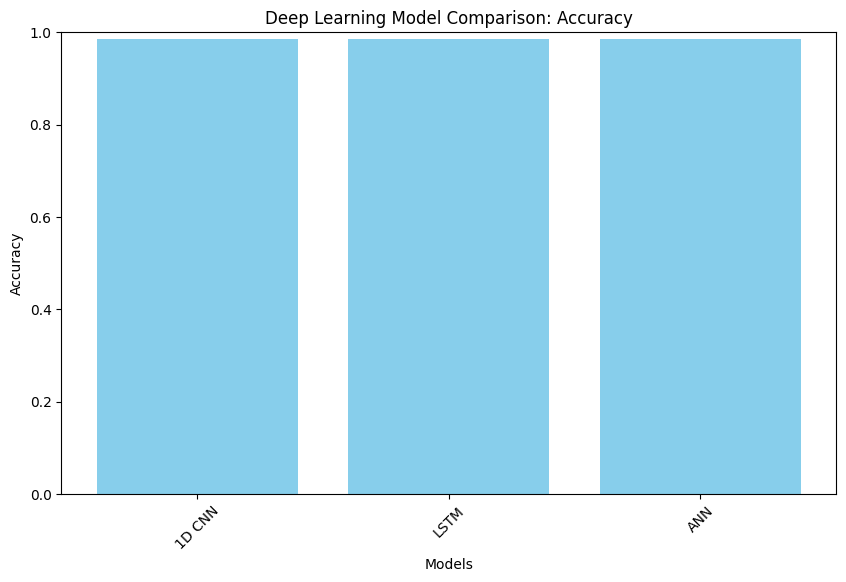


Best Deep Learning Model: ANN
Accuracy: 0.9863


In [ ]:
# Store Deep Learning Model Performance
dl_model_results = {
    "1D CNN": test_accuracy_cnn,        # Replace with actual 1D CNN test accuracy
    "LSTM": test_accuracy_lstm,        # Replace with actual LSTM test accuracy
    "ANN": test_accuracy_ann        # Replace with actual ANN test accuracy
}

# Print Model Performance
print("\nDeep Learning Model Performance Comparison:")
for model, accuracy in dl_model_results.items():
    print(f"{model}: Accuracy = {accuracy:.4f}")

# Generate Comparison Chart
plt.figure(figsize=(10, 6))
plt.bar(dl_model_results.keys(), dl_model_results.values(), color='skyblue')
plt.title("Deep Learning Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Determine Best Model
best_dl_model_name = max(dl_model_results, key=dl_model_results.get)
print(f"\nBest Deep Learning Model: {best_dl_model_name}")
print(f"Accuracy: {dl_model_results[best_dl_model_name]:.4f}")


In [ ]:
ann_model.save('/content/drive/MyDrive/ann_binary.h5')
lstm_model.save('/content/drive/MyDrive/lstm_binary.h5')
ann_model.save('/content/drive/MyDrive/cnn_binary.h5')